# SVM

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from termcolor import colored
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.io import arff
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score


Ideja je pronaci hiperravan koja razdvaja podatke iz 2 klase. 
Ako su podaci linearno razdvojeni koristimo marginu, 
odnosno imacemo uslove da se hipperavan nalazi na bezbednom rastojanju od podataka i da su podaci iz jedne ravni sa jedne strane hiperrvani, a drugi sa druge.Ukoliko podaci nisu linearno razdvojeni koristimo meku marginu, odnosno dopustamo da imamo neke pogresne instance.  

Ucitavamo skup podataka

In [2]:
data = pd.read_csv('/home/user/Desktop/IP/sredjeni_podaci.csv')


In [3]:
data

,Unnamed: 0,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1.0,0,21.0,27.0,6.0,2,1,3,0,...,0,1,7.0,6.0,1,1,0.0,1,0,0
1,1,1.0,0,21.0,22.0,1.0,0,1,3,0,...,0,1,7.0,5.0,1,1,1.0,1,0,0
2,2,1.0,0,21.0,22.0,1.0,0,1,1,1,...,0,1,7.0,5.0,1,0,1.0,1,1,1
3,3,1.0,0,21.0,23.0,2.0,1,1,3,0,...,0,1,7.0,6.0,1,1,0.0,1,1,1
4,4,1.0,0,21.0,24.0,3.0,1,1,4,0,...,0,1,6.0,6.0,1,1,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8373,21.0,1,25.0,26.0,1.0,0,3,4,0,...,0,1,2.0,5.0,0,1,0.0,0,1,0
8374,8374,21.0,1,25.0,24.0,1.0,0,3,5,0,...,0,1,4.0,4.0,0,0,0.0,0,0,0
8375,8375,21.0,1,25.0,29.0,4.0,2,3,4,0,...,0,1,6.0,5.0,1,1,0.0,0,0,0
8376,8376,21.0,1,25.0,22.0,3.0,1,3,1,0,...,0,1,5.0,5.0,0,1,0.0,0,1,0


In [4]:
data.drop('Unnamed: 0',axis =1,inplace = True)

Razdvajamo ciljnu promenljivu od ostalih atrbuta:

In [5]:
y = data['match']
X = data.drop('match',axis =1)

Podatke delimo na trening i test skup,u odnosu 75% - 25 %

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=121)

Standardizujemo podatke

In [7]:


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [8]:
params = [
            {
                'kernel': ['linear'],
                'C': [0.001, 0.01,0.1, 1, 10],
            },
            {
                'kernel': ['rbf'],
                'C': [0.01, 0.1, 1, 10],
                'gamma': [0.001, 0.01,0.1, 1, 10],
            },
         ]

In [9]:
grid_search = GridSearchCV(SVC(), params, scoring='accuracy', cv=4, verbose=4)

In [10]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
[CV 1/4] END ............C=0.001, kernel=linear;, score=1.000 total time=   2.0s
[CV 2/4] END ............C=0.001, kernel=linear;, score=1.000 total time=   1.7s
[CV 3/4] END ............C=0.001, kernel=linear;, score=1.000 total time=   1.9s
[CV 4/4] END ............C=0.001, kernel=linear;, score=1.000 total time=   1.6s
[CV 1/4] END .............C=0.01, kernel=linear;, score=1.000 total time=   0.6s
[CV 2/4] END .............C=0.01, kernel=linear;, score=1.000 total time=   0.6s
[CV 3/4] END .............C=0.01, kernel=linear;, score=1.000 total time=   0.6s
[CV 4/4] END .............C=0.01, kernel=linear;, score=1.000 total time=   0.6s
[CV 1/4] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.5s
[CV 2/4] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.5s
[CV 3/4] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.5s
[CV 4/4] END ..............C=0.1, kernel=linear

GridSearchCV(cv=4, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10],
                          'gamma': [0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=4)

Optimalni parametri:

In [11]:
grid_search.best_params_


{'C': 0.001, 'kernel': 'linear'}

Najveca tacnost:

In [12]:
grid_search.best_score_

1.0

Pomocna funkcija za proveru kvaliteta modela

In [13]:
def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Izvestaj o klasifikaciji za model{} nad {} podacima".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Matrica konfuzije za model {} nad {} podacima ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['1', '0'], index=['1', '0']))
    print("---------------------------------------------------------------------------------")
    


In [14]:
best = grid_search.best_estimator_

In [15]:
y_pred = best.predict(X_test)

In [16]:
report(best,X_train,y_train,text = "TRENING")
report(best,X_test,y_test,text = "TEST")

Izvestaj o klasifikaciji za modelSVC nad TRENING podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5248
           1       1.00      1.00      1.00      1035

    accuracy                           1.00      6283
   macro avg       1.00      1.00      1.00      6283
weighted avg       1.00      1.00      1.00      6283

---------------------------------------------------------------------------------
Matrica konfuzije za model SVC nad TRENING podacima 
---------------------------------------------------------------------------------
      1     0
1  5248     0
0     0  1035
---------------------------------------------------------------------------------
Izvestaj o klasifikaciji za modelSVC nad TEST podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support



In [ ]:
Ovaj model ima tacnost 1 na trening i na test skupu i kad pogledamo matricu konfuzije vidimo da nije napravio nijednu gresku.

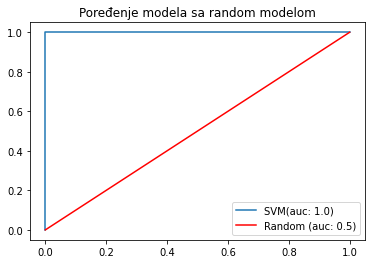

In [21]:
models = [best]
model_names = ['SVM']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela sa random modelom")
plt.legend()
plt.show()
